In [1]:
from sklearn.decomposition import TruncatedSVD
import pickle

with open('./models/generate/relations/csr.pickle', 'rb') as file:
    csr = pickle.load(file)

In [28]:
with open('./models/generate/relations/dataset.pickle', 'rb') as file:
    df = pickle.load(file)

In [31]:
with open('./models/generate/content/dataset.pickle', 'rb') as file:
    items = pickle.load(file)

In [70]:
with open('/Users/ilya/Documents/recsys/models/generate/content/index_to_id.pickle', 'rb') as file:
    item_to_id = pickle.load(file)

In [36]:
item_to_id = {v: k for k, v in item_to_id.items()}

In [59]:
"""Московский зоопарк - 66, 181
Цирковой дивертисмент «Улочки московские» - 181"""

'Московский зоопарк - 66, 181\nЦирковой дивертисмент «Улочки московские» - 181'

In [71]:
ids = [item_to_id[i] for i in items[items.screen=='restaurant']['id'].tolist()]

In [16]:
svd = TruncatedSVD(n_components=3, n_iter=300, random_state=42)
svd.fit(csr)

TruncatedSVD(n_components=3, n_iter=300, random_state=42)

In [73]:
df[df.external_Id.isin(ids)]

,id,external_Id,supplier_id,tariff_id,client_id,status,tickets_count,date_create,activeSince,activeUntil,product_type_code
7656,47021,2256,15403,11302,2803,FINISHED,1,2021-04-07 06:16:27.384000+00:00,2021-04-07T15:16:25+03:00,2021-06-01T03:00:00+03:00,RESTAURANT
7651,47216,341,10808,11403,4271,FINISHED,1,2021-04-07 09:58:12.294000+00:00,2021-04-07T18:58:12+03:00,2021-07-21T03:00:00+03:00,RESTAURANT
7649,47217,341,10808,11403,5843,FINISHED,1,2021-04-07 10:38:11.802000+00:00,2021-04-07T19:38:11+03:00,2021-07-21T03:00:00+03:00,RESTAURANT
7648,47022,58,15509,11309,4271,FINISHED,1,2021-04-07 10:40:47.561000+00:00,2021-04-07T19:40:47+03:00,2021-07-21T03:00:00+03:00,RESTAURANT
7647,47218,2901,15403,11301,4271,FINISHED,1,2021-04-07 10:53:20.582000+00:00,2021-04-07T19:53:20+03:00,2021-07-19T03:00:00+03:00,RESTAURANT
...,...,...,...,...,...,...,...,...,...,...,...
104336,42945886,4818,41668,41899,16563,FINISHED,1,2023-08-24 08:53:03.272000+00:00,2023-08-24T11:53:05+03:00,2030-01-01T23:59:59.999+03:00,RESTAURANT
104335,42945888,20684,43712,55183,16563,FINISHED,1,2023-08-24 08:53:08.097000+00:00,2023-08-24T11:53:24+03:00,2023-11-01T23:59:59.999+03:00,RESTAURANT
104334,42945889,21240,43712,55181,16563,FINISHED,1,2023-08-24 08:53:12.840000+00:00,2023-08-24T11:53:29+03:00,2023-11-01T23:59:59.999+03:00,RESTAURANT
104333,42945890,20685,43712,55179,16563,FINISHED,1,2023-08-24 08:53:32.362000+00:00,2023-08-24T11:53:34+03:00,2023-11-01T23:59:59.999+03:00,RESTAURANT


In [58]:
sorted(svd.components_[2])


[-0.0006631037129784535,
 -0.0005460108933108244,
 -9.366340492166182e-05,
 -2.6815053604485942e-05,
 -1.805077795332838e-05,
 -1.7169221625220076e-05,
 -1.5694709355442477e-05,
 -1.3676571124156759e-05,
 -1.1599640083872636e-05,
 -1.1060088988865426e-05,
 -1.0861545066067478e-05,
 -1.0717364808556176e-05,
 -6.938247932180573e-06,
 -6.336842352354885e-06,
 -5.458877926706796e-06,
 -4.543318610342571e-06,
 -4.156692231333075e-06,
 -2.988171024457283e-06,
 -2.92135478975465e-06,
 -2.875138791641006e-06,
 -2.365764037458181e-06,
 -2.3453126566011007e-06,
 -2.1171374716428736e-06,
 -1.798670751233142e-06,
 -1.6396402614561475e-06,
 -1.5237015921208205e-06,
 -1.0684281756127873e-06,
 -1.0577656206602131e-06,
 -1.0490511471096556e-06,
 -8.723739945308099e-07,
 -8.332036555107997e-07,
 -8.148228105228805e-07,
 -7.600017258694554e-07,
 -6.599026972497933e-07,
 -6.178244190871098e-07,
 -6.112874166730457e-07,
 -5.629402191514889e-07,
 -5.305006024669363e-07,
 -4.988457132902526e-07,
 -4.4916869

Text(0.5, 0, 'Z')

<Figure size 800x600 with 0 Axes>

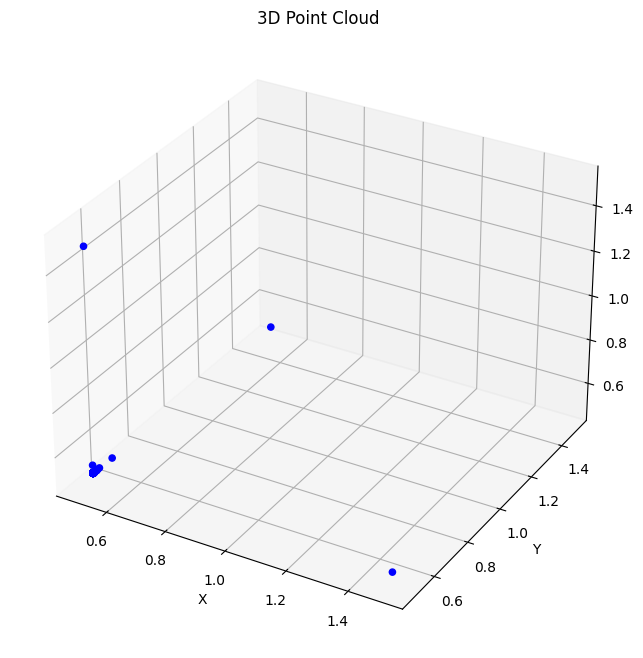

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(svd.components_[0] + [0.5], svd.components_[1] + [0.5], svd.components_[2] + [0.5], c='blue', alpha=1)
ax.set_title('3D Point Cloud')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

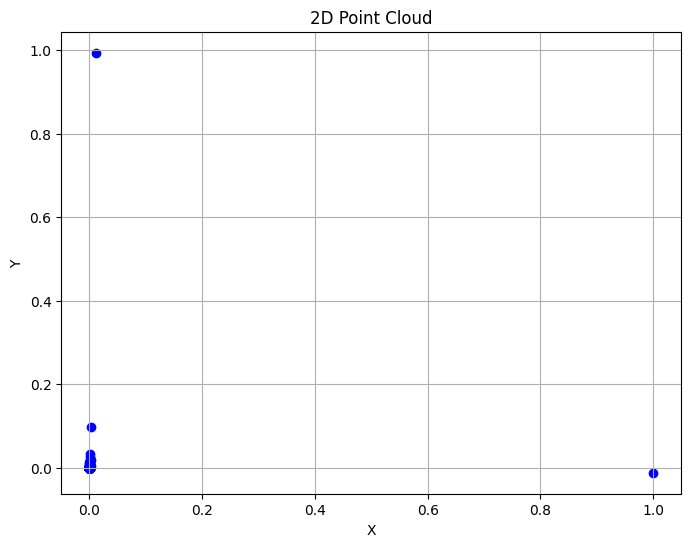

In [64]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(svd.components_[0], svd.components_[1], c='blue', alpha=1)
plt.title('2D Point Cloud')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 800x600 with 0 Axes>

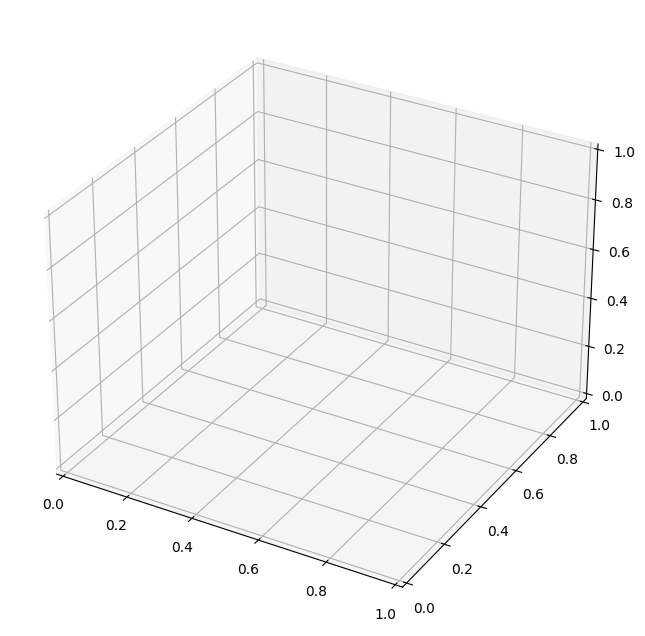

In [64]:
from sklearn.manifold import TSNE

# Generate sample data
np.random.seed(0)
X = svd.components_  # Sample data with 100 samples and 10 features

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=0, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c='blue', alpha=0.5)
ax.set_title('3D Point Cloud')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.41, min_samples=5)
dbscan.fit(svd.components_)
labels = dbscan.labels_

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(X_embedded[labels == label, 0], X_embedded[labels == label, 1], c='black', alpha=0.5, label='Noise')
    else:
        plt.scatter(X_embedded[labels == label, 0], X_embedded[labels == label, 1], alpha=0.5, label=f'Cluster {label}')

plt.title('t-SNE Visualization with DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X_embedded' is not defined

<Figure size 800x600 with 0 Axes>